In [3]:
pacman::p_load(CausalImpact)

In [4]:
set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10
data <- cbind(y, x1)

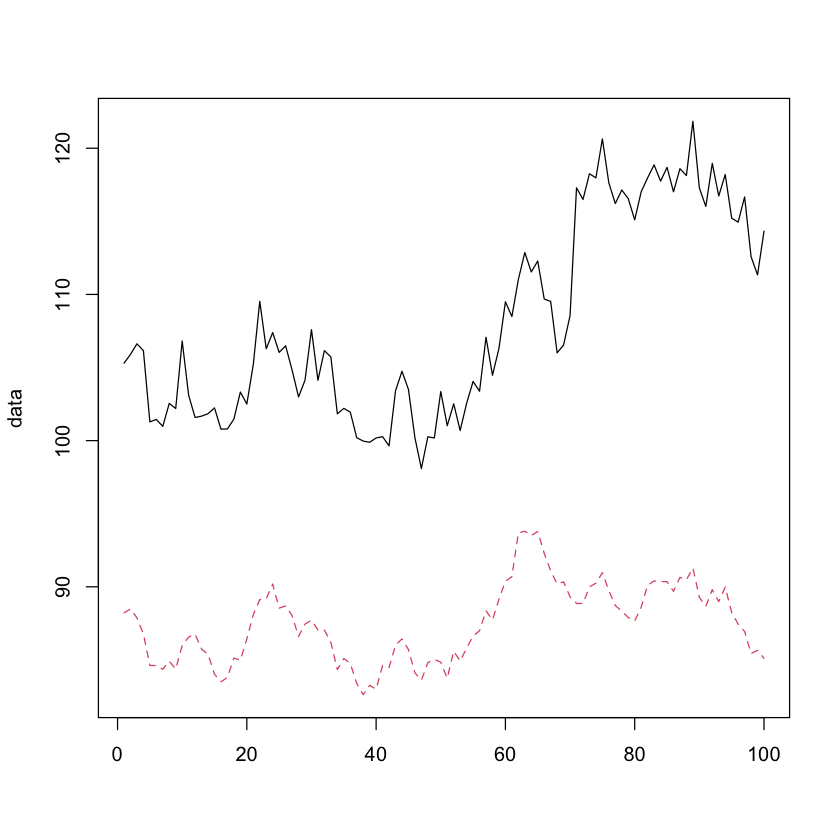

In [6]:
matplot(data, type = "l")

In [7]:
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)

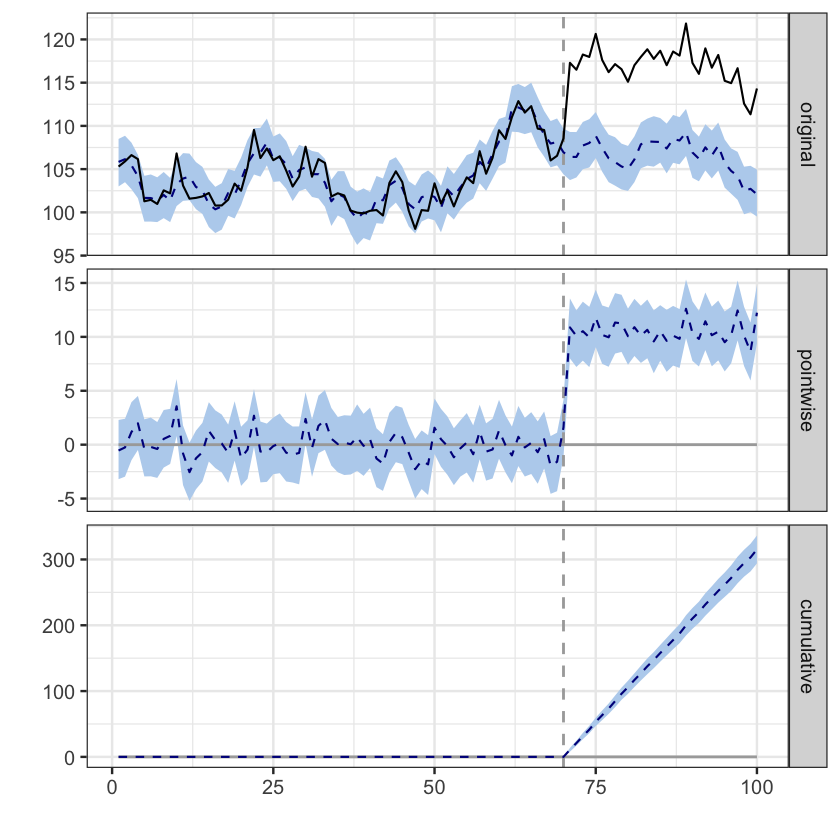

In [8]:
plot(impact)